In [ ]:
# Add Column Names
import os
import pandas as pd

folder_path = "completed"

for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
         
        df = pd.read_excel(file_path, engine='openpyxl')
        
        # Update column names if they exist
        cols = df.columns.tolist()  
        
        if len(cols) >= 13:  
            cols[9] = "pop_density"
            cols[10] = "traffic_rte"
            cols[11] = "visibility"
            cols[12] = "avg_price_level"
            
           
            df.columns = cols
            
           
            df.to_excel(file_path, index=False, engine='openpyxl')
            print(f"Updated: {file}")

print("Processing complete!")

In [ ]:
# Combine Excel Files
import pandas as pd
import os

def combine_excels(input_folder, output_file):
    """Combines all Excel files from a folder into a single large file."""
    all_dataframes = []  # List to store DataFrames


    excel_files = [f for f in os.listdir(input_folder) if f.endswith(".xlsx")]

    if not excel_files:
        print("No processed Excel files found to combine.")
        return

    for file in excel_files:
        input_path = os.path.join(input_folder, file)
        print(f"Reading {file}...")
        
        try:
            df = pd.read_excel(input_path)  # Read Excel file
            df["Source_File"] = file  # Add a column to track the original file
            all_dataframes.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")

    # Combine all DataFrames
    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        combined_df.to_excel(output_file, index=False, engine="openpyxl")
        print(f"Combined file saved as: {output_file}")
    else:
        print("No valid data to combine.")

# Folder containing processed Excel files
processed_folder = "completed"
output_combined_file = "dataset.xlsx"


combine_excels(processed_folder, output_combined_file)

Reading updated_part_1.xlsx...
Reading updated_part_10.xlsx...
Reading updated_part_11.xlsx...
Reading updated_part_12.xlsx...
Reading updated_part_13.xlsx...
Reading updated_part_2.xlsx...
Reading updated_part_22.xlsx...
Reading updated_part_23.xlsx...
Reading updated_part_24.xlsx...
Reading updated_part_25.xlsx...
Reading updated_part_4.xlsx...
Reading updated_part_5.xlsx...
Reading updated_part_6.xlsx...
Reading updated_part_8.xlsx...
Reading updated_part_90.xlsx...
Reading updated_part_91.xlsx...
Reading updated_part_92.xlsx...
Reading updated_part_93.xlsx...
Reading updated_part_94.xlsx...
Reading updated_part_95.xlsx...
Reading updated_part_96.xlsx...
Reading updated_part_97.xlsx...
Reading updated_part_98.xlsx...
Reading updated_part_99.xlsx...
Combined file saved as: dataset.xlsx


In [ ]:
# split the combine dataset into cities files
import pandas as pd
import os

def split_excel_by_city(input_file, output_folder):
   
    data = pd.read_excel(input_file)


    if "city" not in data.columns:
        raise ValueError("Missing required column: city")

    # output folder 
    os.makedirs(output_folder, exist_ok=True)

    # Group data by city 
    for city, city_data in data.groupby("city"):
        # invalid characters in city name 
        safe_city_name = "".join(c if c.isalnum() or c in " _-" else "_" for c in city)

        # output file path
        city_file = os.path.join(output_folder, f"{safe_city_name}.xlsx")

        # Save city-specific data to a new Excel file
        city_data.to_excel(city_file, index=False, engine="openpyxl")
        
        print(f"Saved: {city_file}")


input_file = "dataset.xlsx"
output_folder = "cities"


split_excel_by_city(input_file, output_folder)

Saved: cities\Abohar.xlsx
Saved: cities\Adajan_Surat.xlsx
Saved: cities\Adilabad.xlsx
Saved: cities\Adityapur.xlsx
Saved: cities\Adoni.xlsx
Saved: cities\Agartala.xlsx
Saved: cities\Agra.xlsx
Saved: cities\Ahmednagar.xlsx
Saved: cities\Aizawl.xlsx
Saved: cities\Ajmer.xlsx
Saved: cities\Akola.xlsx
Saved: cities\Akota_Vadodara.xlsx
Saved: cities\Alappuzha.xlsx
Saved: cities\Aligarh.xlsx
Saved: cities\Alipurduar.xlsx
Saved: cities\Alkapuri_Vadodara.xlsx
Saved: cities\Allahabad.xlsx
Saved: cities\Alwar.xlsx
Saved: cities\Ambala.xlsx
Saved: cities\Ambikapur.xlsx
Saved: cities\Ambur.xlsx
Saved: cities\Amravati.xlsx
Saved: cities\Amreli.xlsx
Saved: cities\Amritsar.xlsx
Saved: cities\Anand.xlsx
Saved: cities\Anantapur.xlsx
Saved: cities\Ankleshwar.xlsx
Saved: cities\Annanagar_Chennai.xlsx
Saved: cities\Arakkonam.xlsx
Saved: cities\Arambagh.xlsx
Saved: cities\Arrah.xlsx
Saved: cities\Aruppukottai.xlsx
Saved: cities\Asansol.xlsx
Saved: cities\Athwa_Surat.xlsx
Saved: cities\Aurangabad.xlsx
Saved:

In [ ]:
import pandas as pd
import os
from geopy.distance import geodesic
def calculate_restaurant_stats(input_file, output_file):
 
    try:
        # Read data from Excel
        data = pd.read_excel(input_file)

        # Ensure necessary columns exist
        required_columns = ["name", "rating", "latitude", "longitude", "cuisine"]
        for col in required_columns:
            if col not in data.columns:
                print(f"Skipping {input_file} - Missing column: {col}")
                return
        same_type_restaurants_no = []
        total_no_restaurants = []
        comp_score = []

        for index, row in data.iterrows():
            print(f"Processing {input_file}: Row {index + 1}/{len(data)}")

            # Skip rows with missing coordinates
            if pd.isna(row["latitude"]) or pd.isna(row["longitude"]):
                same_type_restaurants_no.append(0)
                total_no_restaurants.append(0)
                comp_score.append(0)
            else:
                current_location = (row["latitude"], row["longitude"])
                current_cuisines = set(row["cuisine"].split(", ")) if pd.notna(row["cuisine"]) else set()

                # Initialize counters
                same_type_count = 0
                total_count = 0
                comp_score_no = 0

                # Compare with all other restaurants
                for _, other_row in data.iterrows():
                    if pd.isna(other_row["latitude"]) or pd.isna(other_row["longitude"]):
                        continue
                    other_location = (other_row["latitude"], other_row["longitude"])

                    # Check if within 500m radius
                    if geodesic(current_location, other_location).meters <= 500:
                        total_count += 1
                        other_cuisines = set(other_row["cuisine"].split(", ")) if pd.notna(other_row["cuisine"]) else set()
                        if current_cuisines & other_cuisines:
                            same_type_count += 1
                    comp_score_no = (34.3 * same_type_count + 65.7 * total_count) / 100

                # Append results
                same_type_restaurants_no.append(same_type_count)
                total_no_restaurants.append(total_count)
                comp_score.append(comp_score_no)

            # Add results to DataFrame after processing each row
            data.loc[index, "Same_type_restaurants_no"] = same_type_restaurants_no[-1]
            data.loc[index, "Total_no_restaurants"] = total_no_restaurants[-1]
            data.loc[index, "Comp_Score"] = comp_score[-1]
            data.to_excel(output_file, index=False, engine="openpyxl")

        print(f"Finished processing: {input_file} -> Saved to {output_file}")

    except Exception as e:
        print(f"Error processing {input_file}: {e}")

def process_all_excels(input_folder, output_folder):
    """Reads all Excel files in a folder and processes each one."""
    os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists
    excel_files = [f for f in os.listdir(input_folder) if f.endswith(".xlsx")]
    if not excel_files:
        print("No Excel files found in the folder.")
        return
    for file in excel_files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, f"Processed_{file}")
        
        print(f"Starting processing: {file}")
        calculate_restaurant_stats(input_path, output_path)
input_folder = "cities" 
output_folder = "cities_comp" 
process_all_excels(input_folder, output_folder)


Starting processing: Abohar.xlsx
Processing cities\Abohar.xlsx: Row 1/62
Processing cities\Abohar.xlsx: Row 2/62
Processing cities\Abohar.xlsx: Row 3/62
Processing cities\Abohar.xlsx: Row 4/62
Processing cities\Abohar.xlsx: Row 5/62
Processing cities\Abohar.xlsx: Row 6/62
Processing cities\Abohar.xlsx: Row 7/62
Processing cities\Abohar.xlsx: Row 8/62
Processing cities\Abohar.xlsx: Row 9/62
Processing cities\Abohar.xlsx: Row 10/62
Processing cities\Abohar.xlsx: Row 11/62
Processing cities\Abohar.xlsx: Row 12/62
Processing cities\Abohar.xlsx: Row 13/62
Processing cities\Abohar.xlsx: Row 14/62
Processing cities\Abohar.xlsx: Row 15/62
Processing cities\Abohar.xlsx: Row 16/62
Processing cities\Abohar.xlsx: Row 17/62
Processing cities\Abohar.xlsx: Row 18/62
Processing cities\Abohar.xlsx: Row 19/62
Processing cities\Abohar.xlsx: Row 20/62
Processing cities\Abohar.xlsx: Row 21/62
Processing cities\Abohar.xlsx: Row 22/62
Processing cities\Abohar.xlsx: Row 23/62
Processing cities\Abohar.xlsx: Ro

In [ ]:
import pandas as pd
import os

def combine_excels(input_folder, output_file):
    """Combines all Excel files from a folder into a single large file."""
    all_dataframes = []  # List to store DataFrames

    # Get all processed Excel files in the folder
    excel_files = [f for f in os.listdir(input_folder) if f.endswith(".xlsx")]

    if not excel_files:
        print("No processed Excel files found to combine.")
        return

    for file in excel_files:
        input_path = os.path.join(input_folder, file)
        print(f"Reading {file}...")
        
        try:
            df = pd.read_excel(input_path)  # Read Excel file
            all_dataframes.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")

    # Combine all DataFrames
    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        combined_df.to_excel(output_file, index=False, engine="openpyxl")
        print(f"Combined file saved as: {output_file}")
    else:
        print("No valid data to combine.")


processed_folder = "cities_comp"
output_combined_file = "dataset.xlsx"


combine_excels(processed_folder, output_combined_file)


Reading Processed_Abohar.xlsx...
Reading Processed_Adajan_Surat.xlsx...
Reading Processed_Adilabad.xlsx...
Reading Processed_Adityapur.xlsx...
Reading Processed_Adoni.xlsx...
Reading Processed_Agartala.xlsx...
Reading Processed_Agra.xlsx...
Reading Processed_Ahmednagar.xlsx...
Reading Processed_Aizawl.xlsx...
Reading Processed_Ajmer.xlsx...
Reading Processed_Akola.xlsx...
Reading Processed_Akota_Vadodara.xlsx...
Reading Processed_Alappuzha.xlsx...
Reading Processed_Aligarh.xlsx...
Reading Processed_Alipurduar.xlsx...
Reading Processed_Alkapuri_Vadodara.xlsx...
Reading Processed_Allahabad.xlsx...
Reading Processed_Alwar.xlsx...
Reading Processed_Ambala.xlsx...
Reading Processed_Ambikapur.xlsx...
Reading Processed_Ambur.xlsx...
Reading Processed_Amravati.xlsx...
Reading Processed_Amreli.xlsx...
Reading Processed_Amritsar.xlsx...
Reading Processed_Anand.xlsx...
Reading Processed_Anantapur.xlsx...
Reading Processed_Ankleshwar.xlsx...
Reading Processed_Annanagar_Chennai.xlsx...
Reading Proc

# Remove the rupee sign in excel + ratings

In [ ]:
# go through the dataset and remove the rows with --
import pandas as pd

df = pd.read_excel("dataset.xlsx")  

# Remove rows where 'rating' column contains '--'
df = df[df["rating"] != "--"]

# Save the cleaned data back to a new Excel file
df.to_excel("cleaned_file.xlsx", index=False)

print("Rows with '--' in the rating column have been removed.")


Rows with '--' in the rating column have been removed.


In [ ]:
#remove rows with empty ratingcount and change K values to numeric
import pandas as pd

# Load dataset
file_path = "dataset.xlsx"  # Update with actual file path
df = pd.read_excel(file_path)

# Drop rows where 'rating_count' is empty (NaN)
df = df.dropna(subset=['rating_count'])

# Convert 'K' values in 'rating_count' to numeric
df['rating_count'] = df['rating_count'].astype(str).replace(r'(\d+\.?\d*)K', lambda x: str(float(x.group(1)) * 1000), regex=True)

# Save the cleaned file
df.to_excel("cleaned_dataset.xlsx", index=False)

print("Dataset cleaned and saved as 'cleaned_dataset.xlsx'.")


Dataset cleaned and saved as 'cleaned_dataset.xlsx'.


In [ ]:
import pandas as pd

# Load dataset
file_path = "dataset.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)

#  Remove rows where 'rating' column contains '--'
df = df[df["rating"] != "--"]

#  Drop rows where 'rating_count' is empty (NaN)
df = df.dropna(subset=['rating_count'])

# Step 3: Convert 'K' values in 'rating_count' to numeric
df['rating_count'] = df['rating_count'].astype(str).replace(
    r'(\d+\.?\d*)K', lambda x: str(float(x.group(1)) * 1000), regex=True
)

# Save the cleaned dataset
df.to_excel("cleaned_dataset.xlsx", index=False)

print("Cleaned dataset saved as 'cleaned_dataset.xlsx'")


In [ ]:
#rating or rating count not present drop those rows and finds true score
import pandas as pd
import numpy as np

file_path = "dataset1.xlsx"  
df = pd.read_excel(file_path)

# Drop rows with missing values in "rating" or "rating_count"
df = df.dropna(subset=["rating", "rating_count"])

# Convert to numeric (in case they were read as strings)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Define the function to compute True Score
def calculate_true_score(rating, rating_count, C=50):
    """
    Adjusts rating based on the rating count using an exponential confidence factor.
    
    Parameters:
    - rating (float): The place's rating.
    - rating_count (int): The number of ratings.
    - C (int): The scaling factor controlling how much rating count influences the score. 
    Returns:
    - float: The adjusted true score.
    """
    confidence_factor = 1 - np.exp(-rating_count / C)
    return rating * confidence_factor

# Apply the function to compute the True Score for each row
df["true_score"] = df.apply(lambda row: calculate_true_score(row["rating"], row["rating_count"]), axis=1)

#  Save the updated dataset back to an Excel file
output_file = "dataset_true_score.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated file saved as {output_file}")


Updated file saved as dataset_true_score.xlsx


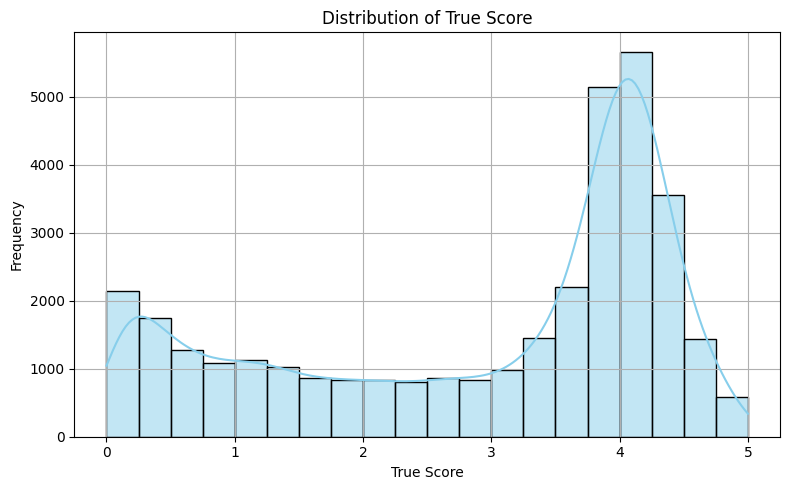

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "dataset_true_score.xlsx"
df = pd.read_excel(file_path)

# Convert true_score to numeric and drop missing values
df["true_score"] = pd.to_numeric(df["true_score"], errors='coerce')
df = df.dropna(subset=["true_score"])

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["true_score"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of True Score")
plt.xlabel("True Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_excel("dataset_true_score.xlsx")

# Filter rows where true_score is below 3
low_score_data = df[df["true_score"] < 3]

# Function to introduce slight variations
def augment_row(row):
    augmented_row = row.copy()
    
    # Add small noise to numerical features
    augmented_row["pop_density"] *= np.random.uniform(0.9, 1.1)
    augmented_row["traffic_rte"] *= np.random.uniform(0.9, 1.1)
    augmented_row["visibility"] *= np.random.uniform(0.9, 1.1)
    augmented_row["avg_price_level"] *= np.random.uniform(0.95, 1.05)
    augmented_row["Comp_Score"] *= np.random.uniform(0.9, 1.1)

    # Adjust cost slightly
    augmented_row["cost"] += np.random.randint(-100, 100)

    return augmented_row
augmented_data = pd.DataFrame([
    augment_row(row) for _, row in low_score_data.iterrows() for _ in range(3)
])

# Combine with original data
df_augmented = pd.concat([df, augmented_data], ignore_index=True)

df_augmented.to_excel("augmented_dataset_true_score.xlsx", index=False)


In [8]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_excel("dataset_true_score.xlsx")

# Filter rows for different augmentation conditions
mid_low_score_data = df[(df["true_score"] < 3.6) & (df["true_score"] >= 1)]
very_low_score_data = df[df["true_score"] < 1]

# Function to introduce slight variations
def augment_row(row):
    augmented_row = row.copy()
    
    # Add small noise to numerical features
    augmented_row["pop_density"] *= np.random.uniform(0.9, 1.1)
    augmented_row["traffic_rte"] *= np.random.uniform(0.9, 1.1)
    augmented_row["visibility"] *= np.random.uniform(0.9, 1.1)
    augmented_row["avg_price_level"] *= np.random.uniform(0.95, 1.05)
    augmented_row["Comp_Score"] *= np.random.uniform(0.9, 1.1)

    # Adjust cost slightly
    augmented_row["cost"] += np.random.randint(-100, 100)

    return augmented_row

# Augment 3x for [1, 3.2)
augmented_mid_low = pd.DataFrame([
    augment_row(row) for _, row in mid_low_score_data.iterrows() for _ in range(3)
])

# Augment 5x for [0, 1)
augmented_very_low = pd.DataFrame([
    augment_row(row) for _, row in very_low_score_data.iterrows() for _ in range(2)
])

# Combine all data
df_augmented = pd.concat([df, augmented_mid_low, augmented_very_low], ignore_index=True)

# Save to Excel
df_augmented.to_excel("augmented_dataset_true_score11.xlsx", index=False)


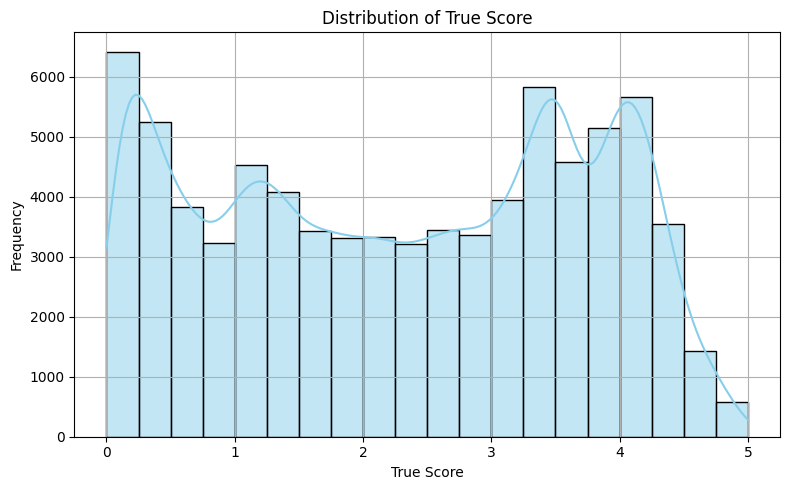

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "augmented_dataset_true_score11.xlsx"
df = pd.read_excel(file_path)

# Convert true_score to numeric and drop missing values
df["true_score"] = pd.to_numeric(df["true_score"], errors='coerce')
df = df.dropna(subset=["true_score"])

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["true_score"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of True Score")
plt.xlabel("True Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
